# *Machine Learning for factor Investing*

http://www.mlfactor.com/index.html 

# Chapter 1 Notations and data

## 1.1 Notations

**Labels y**

(**output, dependent** variables, **predicted** variables) $$ \pmb{y} = y_i $$ approximated by functions of features $$ \pmb{X}_i = (x_{i,1},...,x_{i,K}) $$

**Returns**


$$ r_{t,n} = \frac{p_{t,n}}{p_{t-1,n}}-1 $$


**Here t is the time index and n the asset index**

The purpose of the machine learning engine in factor investing will be to determine the model that maps the **time-t characteristics** of firms to their future performance.

## 1.2 Dataset

Throughout the book, and for the sake of **reproducibility**, we will illustrate the concepts we present with examples of implementation based on a single financial dataset available at https://github.com/shokru/mlfactor.github.io/tree/master/material.

Listed in the US (possibly originating from Canada or Mexico）


**① 1998.11 - 2019.03$~~~~$② 1,207 stocks$~~~~$③ 93 characteristics**

Attributes:


**Valuation** (earning yields, accountng ratios)


**Profitability** and quality (return on equity)


**Momentum** and technical analysis (past returns, relative strength index)


**Risk** (volatilities)


**Estimates** (earnings-per-share)


**Volume** and **Liquidity** (share turnover)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data Processing & Descriptive Statistics

In [2]:
data_raw = pd.read_csv('data_ml.csv')
# Load the compressed data


idx_date = data_raw.index[(data_raw['date'] > '1999-12-31') & (data_raw['date'] < '2019-01-01')].tolist()
# creating and index to retrive the dates


data_ml = data_raw.iloc[idx_date]  
data_ml = data_ml.iloc[:,1:]
# filtering the dataset according to date index

data_ml.head()

,stock_id,date,Advt_12M_Usd,Advt_3M_Usd,Advt_6M_Usd,Asset_Turnover,Bb_Yld,Bv,Capex_Ps_Cf,Capex_Sales,...,Total_Capital,Total_Debt,Total_Debt_Capital,Total_Liabilities_Total_Assets,Vol1Y_Usd,Vol3Y_Usd,R1M_Usd,R3M_Usd,R6M_Usd,R12M_Usd
0,13,2006-12-31,0.25,0.33,0.27,0.22,0.33,0.01,0.13,0.84,...,0.02,0.27,1.0,0.92,0.84,0.88,0.089,0.104,0.344,-0.041
1,13,2007-01-31,0.25,0.32,0.28,0.22,0.40,0.01,0.13,0.84,...,0.02,0.27,1.0,0.92,0.84,0.88,0.039,0.091,-0.011,-0.253
2,13,2007-02-28,0.26,0.30,0.30,0.22,0.15,0.01,0.13,0.84,...,0.02,0.27,1.0,0.92,0.87,0.88,-0.012,0.101,0.118,-0.366
3,17,2015-03-31,0.73,0.64,0.70,0.40,0.47,0.01,0.70,0.74,...,0.40,0.75,1.0,1.00,1.00,0.99,0.174,-0.144,-0.518,-0.376
4,17,2015-04-30,0.72,0.62,0.66,0.40,0.46,0.01,0.70,0.74,...,0.40,0.75,1.0,1.00,1.00,0.99,-0.106,-0.576,-0.535,-0.113


In [3]:
data_ml.describe()

,stock_id,Advt_12M_Usd,Advt_3M_Usd,Advt_6M_Usd,Asset_Turnover,Bb_Yld,Bv,Capex_Ps_Cf,Capex_Sales,Cash_Div_Cf,...,Total_Capital,Total_Debt,Total_Debt_Capital,Total_Liabilities_Total_Assets,Vol1Y_Usd,Vol3Y_Usd,R1M_Usd,R3M_Usd,R6M_Usd,R12M_Usd
count,268336.000000,268336.000000,268336.000000,268336.000000,268336.000000,268336.000000,268336.000000,268336.000000,268336.000000,268336.000000,...,268336.000000,268336.000000,268336.000000,268336.000000,268336.000000,268336.000000,268336.000000,268336.000000,268336.000000,268336.000000
mean,605.659371,0.501108,0.501229,0.501174,0.502585,0.505177,0.502812,0.496881,0.499789,0.496327,...,0.502760,0.502684,0.500301,0.502644,0.500544,0.500518,0.012732,0.036901,0.072339,0.136865
std,350.389737,0.287769,0.287747,0.287758,0.288307,0.288813,0.288454,0.283926,0.285277,0.281457,...,0.288366,0.288486,0.286219,0.288819,0.287415,0.287438,0.176431,0.328289,0.527420,0.737872
min,1.000000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,...,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,-0.922000,-0.929000,-0.980000,-0.991000
25%,303.000000,0.250000,0.250000,0.250000,0.250000,0.260000,0.250000,0.250000,0.250000,0.260000,...,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,-0.042000,-0.063000,-0.079000,-0.090000
50%,606.000000,0.500000,0.500000,0.500000,0.500000,0.510000,0.500000,0.500000,0.500000,0.500000,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.011000,0.030000,0.050000,0.080000
75%,909.000000,0.750000,0.750000,0.750000,0.750000,0.760000,0.750000,0.740000,0.740000,0.730000,...,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.064000,0.123000,0.186000,0.285000
max,1212.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.176000,39.389000,106.929000,95.972000


Text(0.5, 1.0, 'Assets_Number')

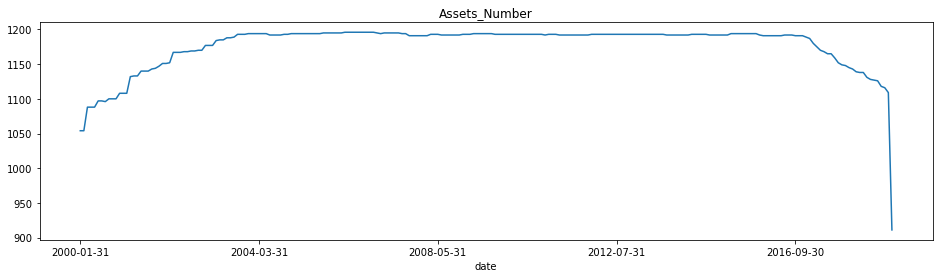

In [4]:
pd.Series(data_ml.groupby('date').size()).plot(figsize = (16,4))
plt.title('Assets_Number')

In [5]:
features = list(data_ml.iloc[:,2:95].columns)
# Keep the feature's column names (hard-coded, beware!)
features_short = ["Div_Yld", "Eps", "Mkt_Cap_12M_Usd", "Mom_11M_Usd", "Ocf", "Pb", "Vol1Y_Usd"]

Text(0, 0.5, 'count')

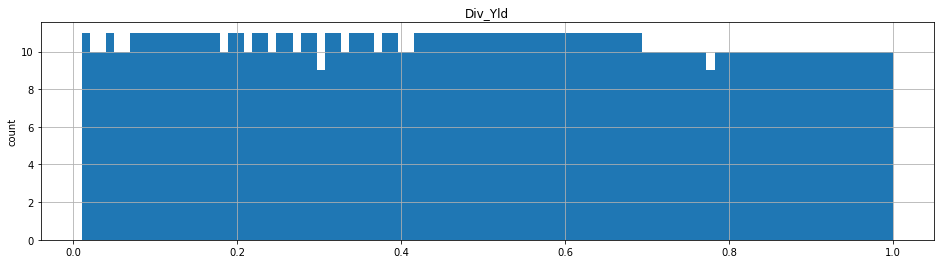

In [6]:
#finding the location 
col_feat_Div_Yld = data_ml.columns.get_loc('Div_Yld')

#filter
is_custom_date = data_ml['date']=='2000-02-29'

data_ml[is_custom_date].iloc[:,[col_feat_Div_Yld]].hist(bins=100, figsize = (16,4))
plt.ylabel('count')

In [7]:
df_median = []
df = []

df_median = data_ml[['date','R1M_Usd','R12M_Usd',]].groupby(['date']).median()
df_median.rename(columns = {'R1M_Usd':'R1M_Usd_median', 'R12M_Usd': 'R12M_Usd_median'}, inplace = True)
df = pd.merge(data_ml, df_median, how = 'left', on = ['date'])

# Classify labels (1,0)
data_ml['R1M_Usd_Decision'] = np.where(df['R1M_Usd'] > df['R1M_Usd_median'], 1.0, 0.0)
data_ml['R12M_Usd_Decision'] = np.where(df['R12M_Usd'] > df['R12M_Usd_median'], 1.0, 0.0)

# Free
df_median = []
df = []

In [8]:
#split sample to training set and testing set
separation_date = "2014-01-15"
index_train = data_ml.index[(data_ml['date'] < separation_date)].tolist() 
index_test = data_ml.index[(data_ml['date'] >= separation_date)].tolist() 

In [9]:
print('Train：{}'.format(len(index_train)))
print('Test：{}'.format(len(index_test)))
print('Proportion：{}'.format(len(index_train)/(len(index_test)+len(index_train))))

Train：198128
Test：70208
Proportion：0.7383578796732455


In [10]:
# empty placeholder
stock_ids_short = []
stock_days = []   

# all stock_ids
stock_ids = data_ml['stock_id'].unique()

# compute the number of data points per stock
stock_days = data_ml[['date','stock_id']].groupby(['stock_id']).count().reset_index()

# Stocks with full data in unified time
stock_ids_short = stock_days.loc[stock_days['date'] == (stock_days['date'].max())]

# in order to get a list 
stock_ids_short = stock_ids_short['stock_id'].unique() 
is_stock_ids_short = data_ml['stock_id'].isin(stock_ids_short)  

# compute returns in matrix format
returns = data_ml[is_stock_ids_short].pivot(index = 'date',columns = 'stock_id',values = 'R1M_Usd') 

In [11]:
stock_days

,stock_id,date
0,1,228
1,2,225
2,3,228
3,4,228
4,5,227
...,...,...
1201,1208,228
1202,1209,228
1203,1210,228
1204,1211,227


Text(0, 0.5, 'Returns')

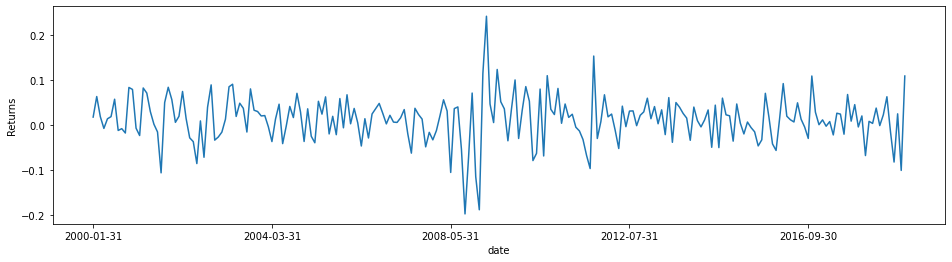

In [12]:
returns.mean(axis = 1).plot(figsize = (16,4))
plt.ylabel("Returns")

In [13]:
returns

stock_id,1,3,4,7,9,11,12,16,17,18,...,1199,1200,1201,1202,1203,1204,1208,1209,1210,1212
date,,,,,,,,,,,,,,,,,,,,,
2000-01-31,-0.036,0.077,-0.016,-0.009,0.032,0.144,-0.110,-0.191,-0.103,0.098,...,-0.509,0.039,-0.011,-0.019,0.168,0.080,-0.372,-0.560,-0.006,-0.186
2000-02-29,0.263,-0.024,0.000,0.027,0.076,0.258,0.110,0.197,-0.053,-0.001,...,-0.147,0.017,-0.148,0.118,0.177,0.161,0.143,-0.102,-0.057,0.104
2000-03-31,0.031,0.018,0.153,0.000,-0.025,0.049,0.134,-0.030,0.074,-0.002,...,0.083,0.006,-0.025,-0.009,0.237,-0.008,0.057,0.144,0.085,-0.143
2000-04-30,0.448,0.027,-0.011,-0.017,-0.022,0.014,0.022,0.161,0.051,-0.037,...,-0.192,0.003,-0.061,0.053,-0.097,-0.114,0.070,-0.103,0.073,0.204
2000-05-31,-0.097,0.050,0.014,0.018,-0.121,-0.116,-0.038,-0.020,0.038,-0.131,...,-0.279,0.014,0.118,0.089,-0.023,-0.089,-0.137,0.113,0.016,0.042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31,-0.002,-0.049,0.036,-0.068,-0.028,0.146,0.040,0.016,0.297,0.025,...,-0.006,-0.005,-0.048,-0.010,0.037,0.005,0.126,-0.009,-0.011,0.044
2018-09-30,-0.155,-0.070,-0.025,-0.052,-0.098,-0.291,-0.044,-0.050,-0.150,-0.135,...,-0.064,-0.013,-0.070,-0.024,-0.030,-0.161,-0.119,0.000,0.028,-0.266
2018-10-31,0.014,0.036,0.000,0.007,-0.018,-0.100,0.074,0.094,-0.081,0.074,...,-0.075,0.068,0.051,0.078,-0.005,0.107,0.205,0.076,0.063,0.013


**References**


**Hartzmark, Samuel M, and David H Solomon. 2019. “The Dividend Disconnect.” Journal of Finance 74 (5): 2153–99.**


在公司分配（特指现金）红利时前（除权除息日），dividend-seek investors会对股票价格造成上升压力，红利发放结束后产生相反结果。

***

# Chapter 3  Factor investing and asset pricing anomalies

## 3.1 Introduction

Asset pricing anomalies are the foundations of **factor investing**. In this chapter our aim is twofold:

① present simple ideas and concepts: **basic factor models and common empirical facts** (time-varying nature of returns and risk premia);


② provide the reader with lists of articles that go much deeper to **stimulate and satisfy curiosity**.

**APT(arbitrage pricing theory)** : Return of an asset $n$ can be modelled as a linear combination of underlying factors $f_k$ :

$$ r_{t,n} = \alpha_n + \sum_{k=1}^K\beta_{n,k}f_{t,k} + \epsilon_{t,n}$$

$$
E[\epsilon_{t,n}] = 0~~~Cov(\epsilon_{t,n},\epsilon_{t,m}) = 0~~for~~n \neq m~~~~and~Cov(f_n,\epsilon_n) = 0
$$

If such factors do exist, then they are **in contradiction with** the cornerstone model in asset pricing: **CAPM**.

According to the CAPM, the only driver of returns is the market portfolio. This explains **why factors are also called ‘anomalies’.**

## 3.2 Detecting anomalies

### 3.2.1 Challenges

Researchers tended to report partial results that are sometimes **invalidated by further studies.**


The **need for replication** is therefore high and many findings have no tomorrow.

P-hacking alone cannot account for all the anomalies documented in the literature.

To reduce the risk of spurious detection ⟶  t-statistics or multiple testing.

Some researchers document fading anomalies because of publication: once the anomaly becomes public, agents invest in it, which pushes prices up and the anomaly disappears

The destruction of factor premia may be due to herding and could be accelerated by the democratization of so-called smart-beta products that allow investors to directly invest in particular styles (value, low volatility, etc.). For a theoretical perspective on the attractivity of factor investing.

The price impact of crowding in the smart-beta universe is mitigated by trading diversification stemming from external institutions that trade according to strategies outside this space (e.g., high frequency traders betting via order-book algorithms).

### 3.2.2 Simple portfolio sorts  △

This is the most common procedure and the one used in Fama and French (1992). The idea is simple.

On one date


1.rank firms according to **a particular criterion** (e.g., size, book-to-market ratio);


2.form **J >= 2** portfolios (i.e., homogeneous groups) consisting of **the same number of stocks** according to the ranking (usually,J = 2, J = 3, J = 5 or J = 10 portfolios are built, based on the median, terciles, quintiles or deciles of the criterion);
  
3.the weight of stocks inside the portfolio is either **uniform (equal weights)**, or **proportional to market capitalization**;

4.at a future date (usually one month), report the returns of the portfolios. Then, **iterate the procedure** until the chronological **end of the sample is reached**.

Instead of focusing on only one criterion, it is possible to group asset according to **more characteristics.** The original paper Fama and French (1992) also combines **market capitalization with book-to-market ratios.**

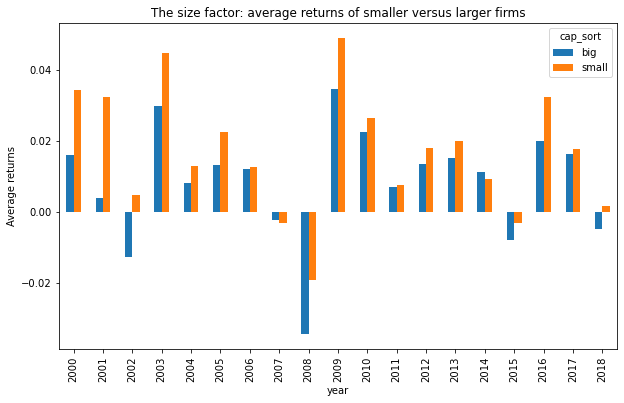

In [14]:
df_median=[]        # empty placeholder
df = []       
df_median = data_ml[['date','Mkt_Cap_12M_Usd']].groupby(['date']).median().reset_index() 
# computing median

df_median.rename(columns = {'Mkt_Cap_12M_Usd': 'cap_median'}, inplace = True) 
# renaming for clarity

df = pd.merge(data_ml[["date",'Mkt_Cap_12M_Usd','R1M_Usd']],df_median,how = 'left', on = ['date']) 
df = df.groupby([pd.to_datetime(df['date']).dt.year,np.where(df['Mkt_Cap_12M_Usd'] > df['cap_median'], 'big', 'small')])['R1M_Usd'].mean().reset_index() 
# groupby and defining "year" and cap logic

df.rename(columns = {'level_1': 'cap_sort'}, inplace = True) 
df.pivot(index='date',columns='cap_sort',values='R1M_Usd').plot.bar(figsize=(10,6))
plt.ylabel('Average returns')
plt.xlabel('year')
plt.title("The size factor: average returns of smaller versus larger firms")
df_median=[]         
#free

The size factor : average returns of smaller versus larger firms.

<AxesSubplot:xlabel='date'>

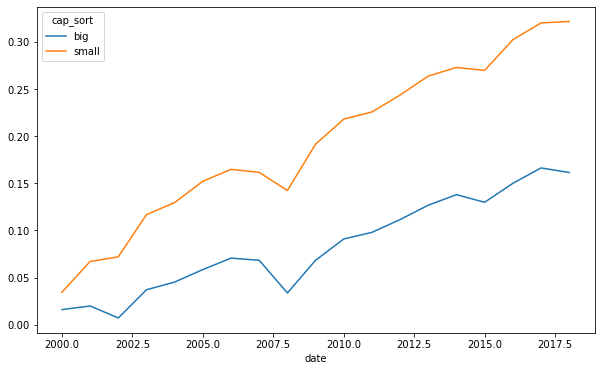

In [15]:
df.pivot(index='date',columns='cap_sort',values='R1M_Usd').cumsum().plot(figsize=(10,6))

### 3.2.3 Factors △

The construction of so-called factors follows the same lines as above. Portfolios are based on one characteristic and the factor is **a long-short ensemble** of **one extreme portfolio minus the opposite extreme (small minus large for the size factor or high book-to-market ratio minus low book-to-market ratio for the value factor)**. 

Sometimes, **subtleties include forming bivariate sorts and aggregating several portfolios together**, as in the original contribution of Fama and French (1993). The most common factors are listed below, along with a few references. We refer to the books listed at the beginning of the chapter for a more exhaustive treatment of factor idiosyncrasies. For most anomalies, theoretical justifications have been brought forward, whether risk-based or behavioral. We list **the most frequently cited factors below:**

1.**Size (SMB = small firms minus large firms)**: Banz (1981), Fama and French (1992), Fama and French (1993), Van Dijk (2011), Asness et al. (2018) and Astakhov, Havranek, and Novak (2019).


2.**Value (HML = high minus low: undervalued minus 'growth' firms)**: Fama and French (1992WML = winners minus losers): Jegadeesh and Titman (1993), Carhart (1997) and C), Fama and French (1993), C. S. Asness, Moskowitz, and Pedersen (2013).


3.**Momentum (WML = winners minus losers)**: Jegadeesh and Titman (1993), Carhart (1997) and C. S. Asness, Moskowitz, and Pedersen (2013). The winners are the assets that have experienced the highest returns over the last year (sometimes the computation of the return is truncated to omit the last month). Cross-sectional momentum is linked, but not equivalent, to time series momentum (trend following), see e.g., Moskowitz, Ooi, and Pedersen (2012) and Lempérière et al. (2014). Momentum is also related to contrarian movements that occur both at higher and lower frequencies (short-term and long-term reversals), see Luo, Subrahmanyam, and Titman (2020).


4.**Profitability (RMW = robust minus weak profits)**: Fama and French (2015), Bouchaud et al. (2019). In the former reference, profitability is measured as (revenues - (cost and expenses))/equity.


5.**Investment (CMA = conservative minus aggressive)**: Fama and French (2015), Hou, Xue, and Zhang (2015). Investment is measured via the growth of total assets (divided by total assets). Aggressive firms are those that experience the largest growth in assets.


6.**Low 'risk' (sometimes, BAB = betting against beta)**: Ang et al. (2006), Baker, Bradley, and Wurgler (2011), Frazzini and Pedersen (2014), Boloorforoosh et al. (2020), Baker, Hoeyer, and Wurgler (2020) and Asness et al. (2020). In this case, the computation of risk changes from one article to the other (simple volatility, market beta, idiosyncratic volatility, etc.).

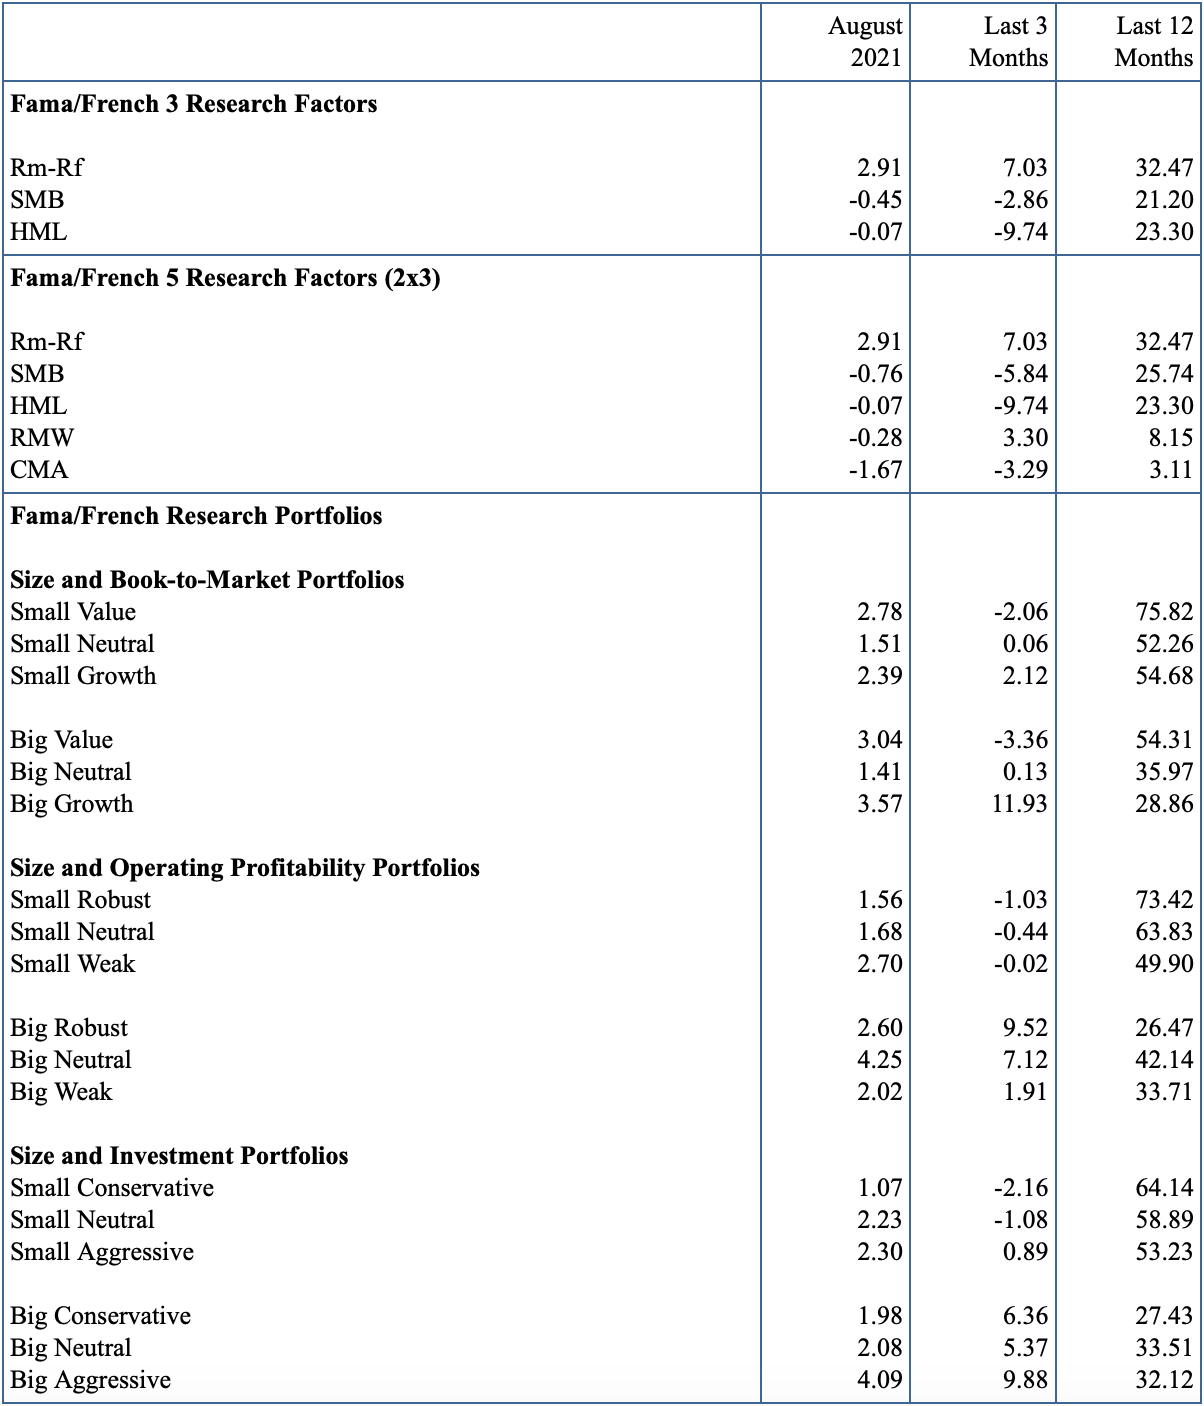

**Data Library of Kenneth French: https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html**


**AQR repository:https://www.aqr.com/Insights/Datasets**

In [16]:
import urllib.request

min_date = '1963-07-31'
max_date = '2020-03-28'
ff_url = "https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/F-F_Research_Data_5_Factors_2x3_CSV.zip" 
# Create the download url 
urllib.request.urlretrieve(ff_url,'factors.zip') 
# Remember to compress it！

('factors.zip', <http.client.HTTPMessage at 0x7fb6ccb25eb0>)

In [17]:
df_ff = pd.read_csv('F-F_Research_Data_5_Factors_2x3.csv', header = 2).iloc[:698]
# renaming for clarity
df_ff.rename(columns = {'Unnamed: 0':'date','Mkt-RF':'MKT_RF'}, inplace = True) 
# renaming for clarity

for i in df_ff.columns[1:]:
    df_ff[i] = pd.to_numeric(df_ff[i])
# object_to_numeric
df_ff[['MKT_RF','SMB','HML','RMW','CMA','RF']] = df_ff[['MKT_RF','SMB','HML','RMW','CMA','RF']]/100.0 
# scale returns
df_ff['year'] = pd.to_datetime(df_ff['date'], format = '%Y%m').dt.year
# scale date

idx_ff = df_ff.index[(df_ff['date'] >= min_date) & (df_ff['date'] <= max_date)].tolist()
FF_factors = df_ff.iloc[idx_ff]
year_temp = FF_factors['year']
FF_factors = FF_factors.drop('year', axis = 1)
# transposition
FF_factors.insert(loc = 0, column = 'year', value = year_temp)
FF_factors.head()

,year,date,MKT_RF,SMB,HML,RMW,CMA,RF
0,1963,196307,-0.0039,-0.0044,-0.0089,0.0068,-0.0123,0.0027
1,1963,196308,0.0507,-0.0075,0.0168,0.0036,-0.0034,0.0025
2,1963,196309,-0.0157,-0.0055,0.0008,-0.0071,0.0029,0.0027
3,1963,196310,0.0253,-0.0137,-0.0014,0.0280,-0.0202,0.0029
4,1963,196311,-0.0085,-0.0089,0.0181,-0.0051,0.0231,0.0027


TABLE 3.1: Sample of monthly factor returns.

Text(0.5, 0, 'date')

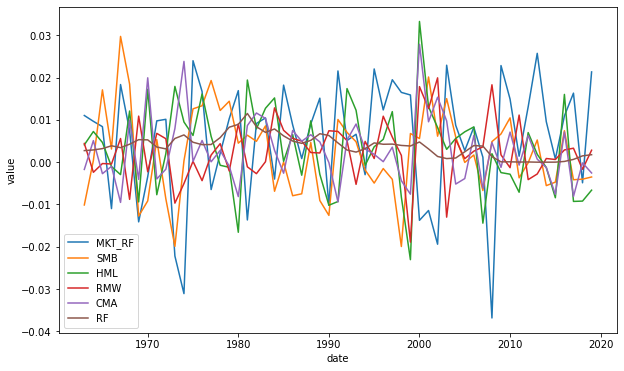

In [18]:
FF_factors.groupby(FF_factors['year']).mean().plot(figsize = (10,6))
# groupby and defining "year" and cap logic
plt.ylabel('value')
plt.xlabel('date')

Average returns of common anomalies (1963-2020). Source: Ken French library.

<AxesSubplot:xlabel='year'>

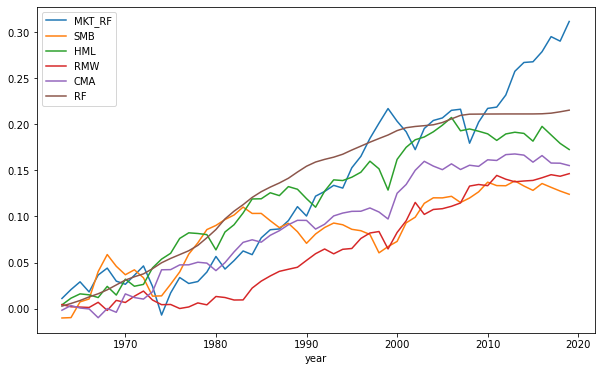

In [19]:
FF_factors.groupby(FF_factors['year']).mean().cumsum().plot(figsize = (10,6))

The **individual attributes of investors** who allocate towards particular factors is a blossoming topic:

1.Betermier, Calvet, and Sodini (2017) show that **value investors are older, wealthier and face lower income risk compared to growth investors who are those in the best position to take financial risks**. 

2.The study Cronqvist, Siegel, and Yu (2015) leads to different conclusions: it finds that the propensity to **invest in value** versus growth assets **has roots in genetics and in life events** (the latter effect being confirmed in Cocco, Gomes, and Lopes (2020), and the former being further detailed in a more general context in Cronqvist et al. (2015)).

3.**Psychological traits** can also explain some factors: when agents extrapolate, they are likely to fuel momentum (this topic is thoroughly reviewed in Barberis (2018)). Micro- and macro-economic consequences of these preferences are detailed in Bhamra and Uppal (2019).Theoretical models have also been proposed that link **agents’ preferences and beliefs (via prospect theory) to market anomalies** (see for instance Barberis, Jin, and Wang (2020)).

### 3.2.4 Predictive regressions, sorts, and p-value issues

For simplicity, we assume a simple form:
$$ r = a + bx + e$$

**r** : all returns of all stocks

**x** : lagged variable

If the estimated  𝑏̂  is significant given a specified threshold, then it can be tempting to conclude that 𝐱 does a good job at predicting returns. Hence, long-short portfolios related to extreme values of  𝐱 (mind the sign of  **𝑏̂**
 ) are expected to generate profits. **This is unfortunately often false because 𝑏̂ gives information on the past ability of 𝐱 to forecast returns.** What happens in the future may be another story.

Statistical tests are also used for portfolio sorts. Assume two extreme portfolios are expected to yield very different average returns (like very small cap versus very large cap, or strong winners versus bad losers). 

**The portfolio returns are written $r_t^{+}$ and $r_t^{-}$.** 

The simplest test for the mean is  $~t = \sqrt{T}\frac{m_{r_+}  -  m_{r_-}}{\sigma_{r_{+}-r_{-}}}$, where $T$ is the number of points and $m_{r_\pm}$ denotes the means of returns and $\sigma_{r_+-r_-}$ is the standard deviation of the difference between the two series, i.e., the volatility of the long-short portfolio. In short, the statistic can be viewed as a **scaled Sharpe ratio** (though usually these ratios are computed for long-only portfolios) and can in turn be used to **compute 𝑝-values to assess the robustness of an anomaly**.

One reason why people are overly optimistic about anomalies they detect is the widespread reverse interpretation of the p-value. Often, it is thought of as the probability of one hypothesis (e.g., my anomaly exists) given the data. In fact, it’s the opposite; **it’s the likelihood of your data sample, knowing that the anomaly holds.**

$$p - value = P[D|H]$$


$$target prob. = P[H|D] = \frac{P[D|H]}{P[D]}\times P[H]$$

**where 𝐻 stands for hypothesis and 𝐷 for data**. The equality in the second row is a plain application of Bayes'identity: the interesting probability is in fact a transform of the $p-value$.

Two articles (at least) discuss this idea. Harvey (2017) introduces **Bayesianized** $p-values$:


$$ Bayesianized~~p - value = Bpv = e^{-t^2/2}\times\frac{prior}{1+e^{-t^2/2}\times prior}$$

where **$t$ is the $t$-statistic obtained from the regression** (i.e., the one that defines the p-value) and **prior is the analyst’s estimation of the odds that the hypothesis (anomaly) is true**.

The prior is coded as follows. Suppose there is a p% chance that the null holds (i.e., (1-p)% for the anomaly). The odds are coded as $p /(1-p)$. Thus, if the t-statistic is equal to 2 (corresponding to a p-value of 5% roughly) and the prior odds are equal to 6, then the Bpv is equal to $e^{-2}\times 6 \times (1+e^{-2}\times 6)^{-1} \approx 0.448$ and there is a 44.8% chance that the null is true. This interpretation stands in sharp contrast with the original $p-value$ which cannot be viewed as a probability that the null holds. Of course, one drawback is that **the level of the prior is crucial and solely user-specified.**

### 3.2.5 Fama-Macbeth regressions △

Another detection method was proposed by Fama and MacBeth (1973) through a two-stage regression analysis of risk premia. 

**The first stage is a simple estimation of the relationship** (  ): the regressions are run on **a stock-by-stock basis over the corresponding time series**. 
The resulting estimates $ \hat{\beta}_{i,k}$ are then plugged into a second series of regressions:


$$r_{t,n} = \gamma_{t,0}+ \sum_{k=1}^K\gamma_{t,k}\hat{\beta}_{n,k}+\epsilon_{t,n}$$

which are run date-by-date on the cross-section of assets.

Theoretically, the betas would be known and the regression would be run on the ${\beta}_{n,k}$ instead of their estimated values. 

The $\hat{\gamma}_{t,k}$ estimate the premia of factor $k$ at time $t$. Under suitable distributional assumptions on the $\epsilon_{t,n}$, statistical tests can be performed to determine whether these premia are significant or not. Typically, the statistic on the time-aggregated (average) premia $\hat{\gamma}_k = \frac{1}{T}\sum^T_{t=1}\hat{\gamma}_{t,k}$:

$$ t_k = \frac{\hat{\gamma}_k}{\hat{\sigma}_k/\sqrt{T}} $$

is often used in pure Gaussian contexts to assess whether or not the factor is significant 

($\hat{\sigma}_k$ is the standard deviation of the $\hat{\gamma}_{t,k}$).

Below, we perform **Fama and MacBeth (1973) regression**s on our sample. We start by the first pass: **individual estimation of betas**. We build a dedicated function below to automate the process.

#### Regression 1

In [20]:
import statsmodels.api as sm

In [21]:
returns.index = pd.to_datetime(returns.index).strftime('%Y%m')

In [22]:
data_FM = pd.merge(returns.iloc[:,0].reset_index(),FF_factors.iloc[:,0:7],how = 'left', on = ['date']).rename(columns = {1:"return"})
data_FM

,date,return,year,MKT_RF,SMB,HML,RMW,CMA
0,200001,-0.036,2000,-0.0474,0.0445,-0.0189,-0.0629,0.0474
1,200002,0.263,2000,0.0245,0.1838,-0.0981,-0.1876,-0.0035
2,200003,0.031,2000,0.0520,-0.1539,0.0823,0.1182,-0.0161
3,200004,0.448,2000,-0.0640,-0.0496,0.0725,0.0767,0.0562
4,200005,-0.097,2000,-0.0442,-0.0387,0.0483,0.0418,0.0132
...,...,...,...,...,...,...,...,...
223,201808,-0.002,2018,0.0344,0.0063,-0.0398,-0.0029,-0.0264
224,201809,-0.155,2018,0.0006,-0.0250,-0.0170,0.0067,0.0128
225,201810,0.014,2018,-0.0768,-0.0450,0.0343,0.0100,0.0354
226,201811,-0.110,2018,0.0169,-0.0076,0.0026,-0.0062,0.0040


In [23]:
data_FM.dropna(inplace = True)
stocks_list = list(returns.columns)

In [67]:
results_params = []
reg_result = []
df_res_full = []
for i in range(len(returns.columns)):
    Y = returns.iloc[:,i].shift(-1).reset_index() #必须注意shift这一点
    Y = Y.drop(columns = ['date'])
    Y.dropna(inplace = True) 
    
    results = sm.OLS(endog = Y,exog = sm.add_constant(data_FM.iloc[0:227,3:])).fit()
    results_params = results.params
    reg_result = pd.DataFrame(results_params)
    reg_result['stock_id'] = stocks_list[i]
    df_res_full.append(reg_result)

In [68]:
# Example
Y1 = returns.iloc[:,0].shift(-1).reset_index()
Y1 = Y1.drop(columns = ['date'])
Y1.dropna(inplace = True)

In [69]:
Y1

,1
0,0.263
1,0.031
2,0.448
3,-0.097
4,-0.157
...,...
222,-0.002
223,-0.155
224,0.014
225,-0.110


In [70]:
data_FM

,date,return,year,MKT_RF,SMB,HML,RMW,CMA
0,200001,-0.036,2000,-0.0474,0.0445,-0.0189,-0.0629,0.0474
1,200002,0.263,2000,0.0245,0.1838,-0.0981,-0.1876,-0.0035
2,200003,0.031,2000,0.0520,-0.1539,0.0823,0.1182,-0.0161
3,200004,0.448,2000,-0.0640,-0.0496,0.0725,0.0767,0.0562
4,200005,-0.097,2000,-0.0442,-0.0387,0.0483,0.0418,0.0132
...,...,...,...,...,...,...,...,...
223,201808,-0.002,2018,0.0344,0.0063,-0.0398,-0.0029,-0.0264
224,201809,-0.155,2018,0.0006,-0.0250,-0.0170,0.0067,0.0128
225,201810,0.014,2018,-0.0768,-0.0450,0.0343,0.0100,0.0354
226,201811,-0.110,2018,0.0169,-0.0076,0.0026,-0.0062,0.0040


In [71]:
sm.add_constant(data_FM.iloc[0:227,3:])

,const,MKT_RF,SMB,HML,RMW,CMA
0,1.0,-0.0474,0.0445,-0.0189,-0.0629,0.0474
1,1.0,0.0245,0.1838,-0.0981,-0.1876,-0.0035
2,1.0,0.0520,-0.1539,0.0823,0.1182,-0.0161
3,1.0,-0.0640,-0.0496,0.0725,0.0767,0.0562
4,1.0,-0.0442,-0.0387,0.0483,0.0418,0.0132
...,...,...,...,...,...,...
222,1.0,0.0319,-0.0195,0.0045,0.0153,0.0036
223,1.0,0.0344,0.0063,-0.0398,-0.0029,-0.0264
224,1.0,0.0006,-0.0250,-0.0170,0.0067,0.0128
225,1.0,-0.0768,-0.0450,0.0343,0.0100,0.0354


In [72]:
results1 = sm.OLS(endog = Y1, exog = sm.add_constant(data_FM.iloc[0:227,3:])).fit()
print("id为1的股票在2000-2018年内的五因子模型回归系数(因子暴露)结果:\n{}".format(pd.DataFrame(results1.params, columns = ['params'])))

id为1的股票在2000-2018年内的五因子模型回归系数(因子暴露)结果:
          params
const   0.017421
MKT_RF  0.132872
SMB     0.091579
HML    -0.386826
RMW     0.505698
CMA     0.462814


In [73]:
df_res_full = pd.concat(df_res_full)
df_res_full.reset_index(inplace = True)
df_res_full.rename(columns = {"index": "factors_name", 0: "betas"},inplace = True)
df_res_full_mat = df_res_full.pivot(index = 'stock_id',columns = 'factors_name',values = 'betas')
column_names_inverted = ["const", "MKT_RF", "SMB","HML","RMW","CMA"]
reg_result = df_res_full_mat.reindex(columns = column_names_inverted)

In [74]:
df_res_full.head()

,factors_name,betas,stock_id
0,const,0.017421,1
1,MKT_RF,0.132872,1
2,SMB,0.091579,1
3,HML,-0.386826,1
4,RMW,0.505698,1


In [75]:
returns

stock_id,1,3,4,7,9,11,12,16,17,18,...,1199,1200,1201,1202,1203,1204,1208,1209,1210,1212
date,,,,,,,,,,,,,,,,,,,,,
200001,-0.036,0.077,-0.016,-0.009,0.032,0.144,-0.110,-0.191,-0.103,0.098,...,-0.509,0.039,-0.011,-0.019,0.168,0.080,-0.372,-0.560,-0.006,-0.186
200002,0.263,-0.024,0.000,0.027,0.076,0.258,0.110,0.197,-0.053,-0.001,...,-0.147,0.017,-0.148,0.118,0.177,0.161,0.143,-0.102,-0.057,0.104
200003,0.031,0.018,0.153,0.000,-0.025,0.049,0.134,-0.030,0.074,-0.002,...,0.083,0.006,-0.025,-0.009,0.237,-0.008,0.057,0.144,0.085,-0.143
200004,0.448,0.027,-0.011,-0.017,-0.022,0.014,0.022,0.161,0.051,-0.037,...,-0.192,0.003,-0.061,0.053,-0.097,-0.114,0.070,-0.103,0.073,0.204
200005,-0.097,0.050,0.014,0.018,-0.121,-0.116,-0.038,-0.020,0.038,-0.131,...,-0.279,0.014,0.118,0.089,-0.023,-0.089,-0.137,0.113,0.016,0.042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201808,-0.002,-0.049,0.036,-0.068,-0.028,0.146,0.040,0.016,0.297,0.025,...,-0.006,-0.005,-0.048,-0.010,0.037,0.005,0.126,-0.009,-0.011,0.044
201809,-0.155,-0.070,-0.025,-0.052,-0.098,-0.291,-0.044,-0.050,-0.150,-0.135,...,-0.064,-0.013,-0.070,-0.024,-0.030,-0.161,-0.119,0.000,0.028,-0.266
201810,0.014,0.036,0.000,0.007,-0.018,-0.100,0.074,0.094,-0.081,0.074,...,-0.075,0.068,0.051,0.078,-0.005,0.107,0.205,0.076,0.063,0.013


In [54]:
reg_result.head()

factors_name,const,MKT_RF,SMB,HML,RMW,CMA
stock_id,,,,,,
1,0.017421,0.132872,0.091579,-0.386826,0.505698,0.462814
3,0.009375,-0.235027,-0.115574,0.092849,-0.202281,-0.347264
4,0.011771,-0.004233,-0.051084,0.008116,-0.311139,-0.019608
7,0.014285,-0.340199,-0.023301,-0.008907,-0.268428,0.234994
9,0.013296,-0.208876,0.257666,0.191505,-0.193516,0.017138


In the table, MKT_RF is the market return minus the risk free rate. 

The corresponding coefficient is often referred to as the $\beta$, especially in univariate regressions. We then reformat these $\beta$ to prepare the second pass. 

Each line corresponds to one asset: **the first column is the asset returns and the remaining ones are the estimated factor loadings (date by date).**

#### Regression 2

In [76]:
returns_trsp = returns.transpose()
df_2nd_pass = pd.concat([reg_result.iloc[:,1:6], returns_trsp], axis = 1)

In [77]:
returns_trsp

date,200001,200002,200003,200004,200005,200006,200007,200008,200009,200010,...,201803,201804,201805,201806,201807,201808,201809,201810,201811,201812
stock_id,,,,,,,,,,,,,,,,,,,,,
1,-0.036,0.263,0.031,0.448,-0.097,-0.157,0.291,0.037,-0.079,0.100,...,0.173,-0.042,-0.038,0.000,-0.077,-0.002,-0.155,0.014,-0.110,0.082
3,0.077,-0.024,0.018,0.027,0.050,0.008,-0.020,0.056,-0.039,-0.012,...,-0.039,0.030,-0.028,-0.039,0.033,-0.049,-0.070,0.036,-0.070,0.030
4,-0.016,0.000,0.153,-0.011,0.014,0.048,-0.005,0.020,0.044,0.049,...,0.071,-0.024,0.059,0.029,-0.004,0.036,-0.025,0.000,-0.088,0.043
7,-0.009,0.027,0.000,-0.017,0.018,0.061,-0.041,-0.016,-0.009,-0.035,...,0.030,0.100,0.036,-0.005,0.022,-0.068,-0.052,0.007,-0.066,0.131
9,0.032,0.076,-0.025,-0.022,-0.121,-0.030,0.072,0.017,-0.006,-0.025,...,0.046,0.047,0.000,0.064,-0.137,-0.028,-0.098,-0.018,-0.099,0.112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,0.080,0.161,-0.008,-0.114,-0.089,0.123,-0.041,-0.118,0.135,0.139,...,-0.038,-0.018,-0.036,0.061,0.046,0.005,-0.161,0.107,-0.050,0.147
1208,-0.372,0.143,0.057,0.070,-0.137,-0.071,-0.055,-0.193,-0.146,-0.549,...,-0.018,-0.130,0.014,0.011,-0.054,0.126,-0.119,0.205,-0.189,0.227
1209,-0.560,-0.102,0.144,-0.103,0.113,0.155,0.049,0.116,0.007,-0.108,...,-0.052,0.066,-0.020,0.016,0.142,-0.009,0.000,0.076,-0.147,0.092


In [78]:
df_2nd_pass.head()

,MKT_RF,SMB,HML,RMW,CMA,200001,200002,200003,200004,200005,...,201803,201804,201805,201806,201807,201808,201809,201810,201811,201812
stock_id,,,,,,,,,,,,,,,,,,,,,
1,0.132872,0.091579,-0.386826,0.505698,0.462814,-0.036,0.263,0.031,0.448,-0.097,...,0.173,-0.042,-0.038,0.000,-0.077,-0.002,-0.155,0.014,-0.110,0.082
3,-0.235027,-0.115574,0.092849,-0.202281,-0.347264,0.077,-0.024,0.018,0.027,0.050,...,-0.039,0.030,-0.028,-0.039,0.033,-0.049,-0.070,0.036,-0.070,0.030
4,-0.004233,-0.051084,0.008116,-0.311139,-0.019608,-0.016,0.000,0.153,-0.011,0.014,...,0.071,-0.024,0.059,0.029,-0.004,0.036,-0.025,0.000,-0.088,0.043
7,-0.340199,-0.023301,-0.008907,-0.268428,0.234994,-0.009,0.027,0.000,-0.017,0.018,...,0.030,0.100,0.036,-0.005,0.022,-0.068,-0.052,0.007,-0.066,0.131
9,-0.208876,0.257666,0.191505,-0.193516,0.017138,0.032,0.076,-0.025,-0.022,-0.121,...,0.046,0.047,0.000,0.064,-0.137,-0.028,-0.098,-0.018,-0.099,0.112


We observe that the values of the first column (market $\beta$ ) revolve around one, which is what we would expect. 

**Finally, we are ready for the second round of regressions.**

In [79]:
returns_trsp = returns.transpose()
df_2nd_pass = pd.concat([reg_result.iloc[:,1:6], returns.transpose()], axis = 1)
betas = df_2nd_pass.iloc[:,0:5]
date_list = list(returns_trsp.columns)

results_params = []
reg_result = []
df_res_full = []

In [80]:
for j in range(len(returns_trsp.columns)):
    Y = returns_trsp.iloc[:,j]
    results = sm.OLS(endog = Y, exog = sm.add_constant(betas)).fit()
    results_params = results.params
    reg_result_tmp = pd.DataFrame(results_params)
    reg_result_tmp['date'] = date_list[j]
    df_res_full.append(reg_result_tmp)

df_res_full = pd.concat(df_res_full)
df_res_full.reset_index(inplace = True)
gammas = df_res_full

gammas.rename(columns = {"index": "factors_name", 0: "betas"}, inplace = True)
gammas_mat = gammas.pivot(index = 'date',columns = 'factors_name', values = 'betas')
column_names_inverted = ["const", "MKT_RF", "SMB","HML","RMW","CMA"]
gammas_mat = gammas_mat.reindex(columns = column_names_inverted)
gammas_mat.head()

factors_name,const,MKT_RF,SMB,HML,RMW,CMA
date,,,,,,
200001,0.016463,-0.018021,-0.003159,0.028311,0.074896,0.027349
200002,0.041402,0.005001,0.000381,-0.052686,-0.092171,0.034666
200003,0.014116,0.023280,0.054469,-0.071862,-0.100834,-0.048517
200004,0.133413,0.148667,-0.460785,0.283459,0.353281,-0.074988
200005,0.012644,-0.030847,-0.060202,0.070402,0.104764,0.069990


Sample of gamma (premia) values.

Visually, the estimated premia are also **very volatile**. We plot their estimated values for the market, SMB and HML factors.

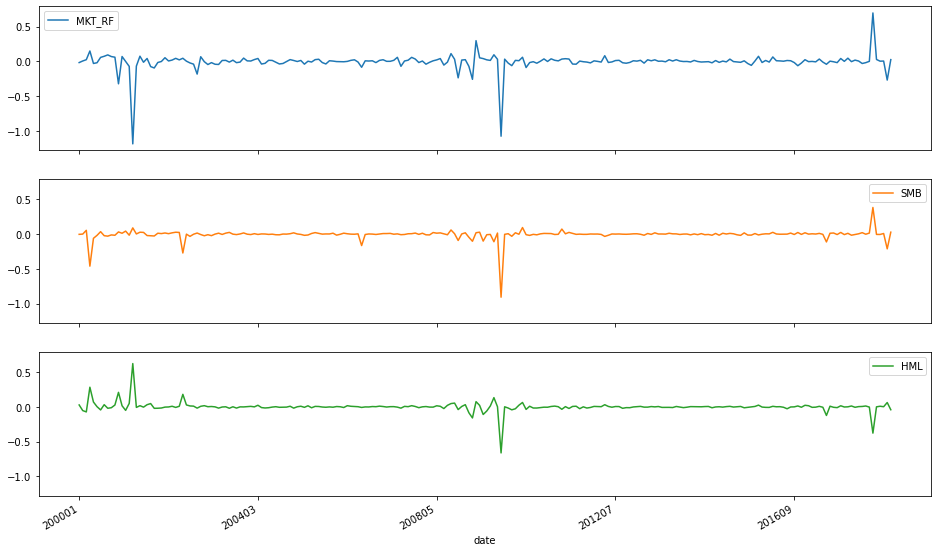

In [35]:
gammas_mat.iloc[:,1:4].plot(figsize = (16,10), subplots = True, sharey = True, sharex = True)
plt.show()

                        Time series plot of gammas (premia) in Fama-Macbeth regressions

The two spikes at the end of the sample signal potential colinearity issues; two factors seem to compensate in an unclear aggregate effect.

This underlines the **usefulness of penalized estimates(Chapter 5)**

### 3.2.6 Factor competition △

The core purpose of factors is to explain the **cross-section of stock returns**. For theoretical and practical reasons, it is preferable if **redundancies within factors are avoided**. 

Indeed, redundancies imply **collinearity which is known to perturb estimates**(Belsley, Kuh, and Welsch (2005)). In addition, when asset managers decompose the performance of their returns into factors, **overlaps (high absolute correlations) between factors yield exposures that are less interpretable**; **positive and negative exposures compensate each other spuriously.** 


A simple protocol to **sort out redundant factors** is to **run regressions of each factor against all others:**

$$f_{t,k} = a_k + \sum_{j\neq k}\delta_{k,j}f_{t,j} + \epsilon_{t,k}$$

The interesting metric is then the test statistic associated to the estimation of $a_k$:

**If $a_k$ is significantly different from 0, then the cross-section of (other) factors fails to explain exhaustively the average return of factor $k$. Otherwise, the return of the factor can be captured by exposures to the other factors and is thus redundant.**

One mainstream application of this technique was performed in Fama and French (2015), in which the authors show that the **HML factor is redundant when taking into account four other factors (Market, SMB, RMW and CMA)**. 

Below, we reproduce their analysis on an updated sample. We start our analysis directly with the database maintained by Kenneth French.

#### Reproduction of how the HML factor is redundant：

In [36]:
import numpy as np
import statsmodels.api as sm

df_res_full = []
for i in range(0,5):
    factors_list_full = ["MKT_RF", "SMB", "HML", "RMW", "CMA"]
    factors_list_tmp = factors_list_full
    Y = FF_factors[factors_list_full[i]]
    factors_list_tmp.remove(factors_list_full[i])
    data = FF_factors[factors_list_tmp]
    results = sm.OLS(endog = Y,exog = sm.add_constant(data)).fit()
    results_param = results.params
    reg_result_tmp = pd.DataFrame(results_param)
    reg_result_tmp['factor_mnemo'] = Y.name
    reg_result_tmp['pvalue'] = results.pvalues
    df_res_full.append(reg_result_tmp)

df_res_full = pd.concat(df_res_full)
df_res_full.reset_index(inplace = True)
df_res_full.rename(columns = {0: "coeff"},inplace = True)

We obtain the vector of $\alpha$ values from Equation( ). 

Below, we format these figures along with $p$ thresholds and export them in a summary table. 

The significance levels of coefficients is coded as follows: 

$$ 0 < (***) < 0.001 < (**) < 0.01 < (*) <0.05 $$

In [37]:
df_significance = df_res_full

# create a conditions' list
conditions = [(df_significance['pvalue'] > 0) & (df_significance['pvalue'] < 0.001), 
(df_significance['pvalue'] > 0.001) & (df_significance['pvalue'] < 0.01),
(df_significance['pvalue'] > 0.01) & (df_significance['pvalue'] < 0.05),
(df_significance['pvalue'] > 0.05)]

# Values assign for each condition
valuest = ['(***)','(**)','(*)','na']

# create a new column and use np.select to assign values to it using our lists as arguments
df_significance['significance'] = np.select(conditions, valuest).astype(str)
df_significance['coeff'] = round(df_significance.coeff,3)
df_significance['coeff_stars'] = df_significance.coeff.astype(str)+' '+df_significance.significance

# display updated DataFrame in the right shape
df_significance_pivot = df_significance.pivot(index = 'index',columns = 'factor_mnemo',values = 'coeff_stars').transpose()
df_significance_pivot = df_significance_pivot.reindex(columns = column_names_inverted)
df_significance_pivot.reindex(factors_list_full)

index,const,MKT_RF,SMB,HML,RMW,CMA
factor_mnemo,,,,,,
MKT_RF,0.008 (***),NaN,0.253 (***),0.115 na,-0.368 (***),-0.955 (***)
SMB,0.003 (*),0.13 (***),NaN,0.075 na,-0.436 (***),-0.133 na
HML,-0.0 na,0.031 na,0.04 na,NaN,0.167 (***),1.021 (***)
RMW,0.004 (***),-0.098 (***),-0.226 (***),0.164 (***),NaN,-0.319 (***)


Factor competition among the Fama and French (2015) five factors.

#### Conclusions

We confirm that the HML factor remains redundant when the four others are present in the asset pricing model. The figures we obtain are very close to the ones in the original paper (Fama and French (2015)), which makes sense, since we only add 5 years to their initial sample.

At a more macro-level, researchers also try to figure out which models (i.e., combinations of factors) are the most likely, given the data empirically observed (and possibly given priors formulated by the econometrician). For instance, this stream of literature seeks to quantify to which extent the 3-factor model of Fama and French (1993) outperforms the 5 factors in Fama and French (2015). In this direction, De Moor, Dhaene, and Sercu (2015) introduce a novel computation for p-values that compare the relative likelihood that two models pass a zero-alpha test. More generally, the Bayesian method of Barillas and Shanken (2018) was subsequently improved by Chib, Zeng, and Zhao (2020).

Lastly, even the optimal number of factors is a subject of disagreement among conclusions of recent work. While the traditional literature focuses on a limited number (3-5) of factors, more recent research by DeMiguel et al. (2020), He, Huang, and Zhou (2020), Kozak, Nagel, and Santosh (2019) and Freyberger, Neuhierl, and Weber (2020) advocates the need to use at least 15 or more (in contrast, Kelly, Pruitt, and Su (2019) argue that **a small number of latent factors may suffice**). Green, Hand, and Zhang (2017) even find that the number of characteristics that help explain the cross-section of returns varies in time.

### 3.2.7 Advanced techniques

The ever increasing number of factors combined to their importance in asset management has led researchers to craft more subtle methods in order to organize’’ the so-called factor zoo and, more importantly, to detect spurious anomalies and compare different asset pricing model specifications. We list a few of them below. - Feng, Giglio, and Xiu (2020) combine LASSO selection with Fama-MacBeth regressions to test if new factor models are worth it. They quantify the gain of adding one new factor to a set of predefined factors and show that many factors reported in papers published in the 2010 decade do not add much incremental value;

**I.**C. Harvey and Liu (2019) (in a similar vein) use bootstrap on orthogonalized factors. They make the case that correlations among predictors is a major issue and their method aims at solving this problem. Their lengthy procedure seeks to test if maximal additional contribution of a candidate variable is significant;

**II.**Fama and French (2018) compare asset pricing models through squared maximum Sharpe ratios;


**III.**Giglio and Xiu (2019) estimate factor risk premia using a three-pass method based on principal component analysis;


**IV.**Pukthuanthong, Roll, and Subrahmanyam (2018) disentangle priced and non-priced factors via a combination of principal component analysis and Fama and MacBeth (1973) regressions;


**V.**Gospodinov, Kan, and Robotti (2019) warn against factor misspecification (when spurious factors are included in the list of regressors). Traded factors ( $resp$. macro-economic factors) seem more likely ( $resp$.less likely) to yield robust identifications (see also Bryzgalova (2019)).

**There is obviously no infallible method, but the number of contributions in the field highlights the need for robustness.** This is evidently a major concern when crafting investment decisions based on factor intuitions. One major hurdle for short-term strategies is the likely time-varying feature of factors. We refer for instance to Ang and Kristensen (2012) and Cooper and Maio (2019) for practical results and to Gagliardini, Ossola, and Scaillet (2016) and S. Ma et al. (2020) for more theoretical treatments (with additional empirical results).

## 3.3 Factors or characteristics?

The decomposition of returns into linear factor models is convenient because of its simple interpretation. There is nonetheless a debate in the academic literature about **whether firm returns are indeed explained by exposure to macro-economic factors or simply by the characteristics of firms.** 

In their early study, Lakonishok, Shleifer, and Vishny (1994) argue that one explanation of the value premium comes from incorrect extrapolation of past earning growth rates. Investors are overly optimistic about firms subject to recent profitability. Consequently, future returns are (also) driven by the core (accounting) features of the firm. 

**The question is then to disentangle which effect is the most pronounced when explaining returns: characteristics versus exposures to macro-economic factors.**

I. In their seminal contribution on this topic, Daniel and Titman (1997) provide evidence in favour of the former (two follow-up papers are K. Daniel, Titman, and Wei (2001) and Daniel and Titman (2012)). They show that firms with high book-to-market ratios or small capitalizations display higher average returns, even if they are negatively loaded on the HML or SMB factors. Therefore, it seems that it is indeed the intrinsic characteristics that matter, and not the factor exposure. For further material on characteristics’ role in return explanation or prediction, we refer to the following contributions: - Section 2.5.2. in Goyal (2012) surveys pre-2010 results on this topic;

II. Chordia, Goyal, and Shanken (2019) find that characteristics explain a larger proportion of variation in estimated expected returns than factor loadings;

III. Kozak, Nagel, and Santosh (2018) reconcile factor-based explanations of premia to a theoretical model in which some agents’ demands are sentiment driven;

IV. Han et al. (2019) show with penalized regressions that 20 to 30 characteristics (out of 94) are useful for the prediction of monthly returns of US stocks. Their methodology is interesting: they regress returns against characteristics to build forecasts and then regress the returns on the forecast to assess if they are reliable. The latter regression uses a LASSO-type penalization (see Chapter 5) so that useless characteristics are excluded from the model. The penalization is extended to elasticnet in Rapach and Zhou (2019).

V. Kelly, Pruitt, and Su (2019) and Kim, Korajczyk, and Neuhierl (2019) both estimate models in which factors are latent but loadings (betas) and possibly alphas depend on characteristics. Kirby (2020) generalizes the first approach by introducing regime-switching. In contrast, Lettau and Pelger (2020a) and Lettau and Pelger (2020b) estimate latent factors without any link to particular characteristics (and provide large sample asymptotic properties of their methods).

VI. In the same vein as Hoechle, Schmid, and Zimmermann (2018), Gospodinov, Kan, and Robotti (2019) and Bryzgalova (2019) and discuss potential errors that arise when working with portfolio sorts that yield long-short returns. The authors show that in some cases, tests based on this procedure may be deceitful. This happens when the characteristic chosen to perform the sort is correlated with an external (unobservable) factor. They propose a novel regression-based approach aimed at bypassing this problem.

More recently and in a separate stream of literature, R. S. J. Koijen and Yogo (2019) have introduced a demand model in which investors form their portfolios according to their preferences towards particular firm characteristics. They show that this allows them to mimic the portfolios of large institutional investors. In their model, aggregate demands (and hence, prices) are directly linked to characteristics, not to factors. In a follow-up paper, R. S. Koijen, Richmond, and Yogo (2019) show that a few sets of characteristics suffice to predict future returns. They also show that, based on institutional holdings from the UK and the US, the largest investors are those who are the most influencial in the formation of prices. In a similar vein, Betermier, Calvet, and Jo (2019) derive an elegant (theoretical) general equilibrium model that generates some well-documented anomalies (size, book-to-market). The models of Arnott et al. (2014) and Alti and Titman (2019) are also able to theoretically generate known anomalies. Finally, in I. Martin and Nagel (2019), characteristics influence returns via the role they play in the predictability of dividend growth. This paper discussed the asymptotic case when the number of assets and the number of characteristics are proportional and both increase to infinity.

## 3.4 Hot Topics: momentum, timing and ESG

### 3.4.1 Factor momentum △

Given the data obtained on Ken French’s website, we compute the autocorrelation function (ACF) of factors. We recall that

$${ACF}_k(x_t) = E[(x_t-\bar{x})(x_{t+k}-\bar{x})]$$ 

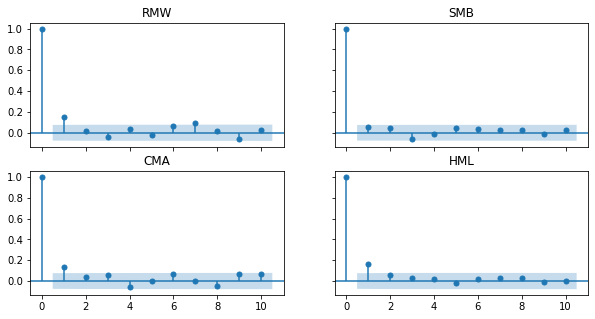

In [81]:
import statsmodels.api as sm

fig, ax = plt.subplots(2,2,figsize = (10,5),sharex = 'all', sharey = 'all') 
sm.graphics.tsa.plot_acf(FF_factors.RMW, lags = 10, ax = ax[0,0],title = 'RMW')
sm.graphics.tsa.plot_acf(FF_factors.CMA, lags = 10, ax = ax[1,0],title = 'CMA')
sm.graphics.tsa.plot_acf(FF_factors.SMB, lags = 10, ax = ax[0,1],title = 'SMB')
sm.graphics.tsa.plot_acf(FF_factors.HML, lags = 10, ax = ax[1,1],title = 'HML')
plt.show()

Autocorrelograms of common factor portfolios.

Of the four chosen series, **only the size factor is not significantly autocorrelated at the first order**.

### 3.4.2 Factor timing

**Given the abundance of evidence of the time-varying nature of factor premia, it is legitimate to wonder if it is possible to predict when factor will perform well or badly.**

The evidence on the effectiveness of timing is diverse: **positive** for Greenwood and Hanson (2012), Hodges et al. (2017), Hasler, Khapko, and Marfe (2019), Haddad, Kozak, and Santosh (2020) and Lioui and Tarelli (2020), **negative** for Asness et al. (2017) and mixed for Dichtl et al. (2019). 

There is **no consensus on which predictors to use** (general macroeconomic indicators in Hodges et al. (2017), stock issuances versus repurchases in Greenwood and Hanson (2012), and aggregate fundamental data in Dichtl et al. (2019)). 

A method for building reasonable timing strategies for long-only portfolios with sustainable transaction costs is laid out in Leippold and Rüegg (2020). 

In ML-based factor investing, it is possible to resort to more granularity by **combining firm-specific attributes to large-scale economic data as we explain in Section 4.7.2.**

### 3.4.3 The green factors

The demand for ethical financial products has sharply risen during the 2010 decade, leading to the creation of funds dedicated to socially responsible investing (SRI - see Camilleri (2020)). Though this phenomenon is not really new (Schueth (2003), Hill et al. (2007)), its acceleration has prompted research about whether or not characteristics related to ESG criteria (environment, social, governance) are priced. Dozens and even possibly hundreds of papers have been devoted to this question, but no consensus has been reached. More and more, researchers study the financial impact of climate change (see Bernstein, Gustafson, and Lewis (2019), Hong, Li, and Xu (2019) and Hong, Karolyi, and Scheinkman (2020)) and the societal push for responsible corporate behavior (Fabozzi (2020), Kurtz (2020)). We gather below a very short list of papers that suggests conflicting results:

**1.favorable**: ESG investing works (Kempf and Osthoff (2007), Cheema-Fox et al. (2020)), can work (Nagy, Kassam, and Lee (2016), Alessandrini and Jondeau (2020)), or can at least be rendered efficient (Branch and Cai (2012)). A large meta-study reports overwhelming favorable results (Friede, Busch, and Bassen (2015)), but of course, they could well stem from the publication bias towards positive results.

**2.unfavorable**: Ethical investing is not profitable according to Adler and Kritzman (2008) and Blitz and Swinkels (2020). An ESG factor should be long unethical firms and short ethical ones (Lioui (2018)).


**3.mixed**: ESG investing may be beneficial globally but not locally (Chakrabarti and Sen (2020)). Portfolios relying on ESG screening do not significantly outperform those with no screening but are subject to lower levels of volatility (Gibson et al. (2020), Gougler and Utz (2020)). As is often the case, the devil is in the details, and results depend on whether to use E, S or G (Bruder et al. (2019)).

On top of these contradicting results, several articles point towards complexities in the measurement of ESG. Depending on the chosen criteria and on the data provider, results can change drastically (see Galema, Plantinga, and Scholtens (2008), Berg, Koelbel, and Rigobon (2020) and Atta-Darkua et al. (2020)).

We end this short section by noting that of course ESG criteria can directly be integrated into ML model, as is for instance done in Franco et al. (2020).

## 3.5 The links with machine learning

### 3.5.1 Formulation

Given the exponential increase in data availability, the obvious temptation of any asset manager is to try to infer future returns from the abundance of attributes available at the firm level. We allude to classical data like accounting ratios and to alternative data, such as sentiment. This task is precisely the aim of Machine Learning. **Given a large set of predictor variables ($X$), the goal is to predict a proxy for future performance $y$ through a model.**

The general formulation is the following. 

At time  $T$ , the agent or investor seeks to solve the following program:

$$\mathop{max}\limits_{\theta_T}E_T[u(r_{p,T+1})] = \mathop{max}\limits_{\theta_T}E_T[u~(~(\bar{w}_T + x_T\theta_T)^{'}r_{T+1})]$$

where $u$ is some utility function and $r_{p,T+1} = (\bar{w}_T + x_T\theta_T)^{'}r_{T+1}$ is the return of the portfolio, which is defined as a benchmark $\bar{w}_T$ plus some deviations from this benchmark that are a linear function of features $x_T\theta_T.The above program may be subject to some external constraints (e.g., to limit leverage).

In practice, the vector $\theta_T$ must be estimated using past data(from $T - \tau$ to $T - 1$ ): the agent seeks the solution of
 ): the agent seeks the solution of
 
$$\mathop{max}\limits_{\theta_T}\frac{1}{\tau}\sum_{t=T-\tau}^{T-1}u({\sum_{i=1}^{N_T}(\bar{w}_{i,t}+\theta^{'}_Tx_{i,t})~r_{i,t+1}})$$

on a sample of size $\tau$ where $N_T$ is the number of asset in the universe. The above formulation can be viewed as a learning task in which the parameters are chosen such that **the reward (average return) is maximized.**

**A short list of recent references**

Independent of a characteristics-based approach, ML applications in finance have blossomed, initially working with price data only and later on integrating firm characteristics as predictors. We cite a few references below, grouped by methodological approach:

1.penalized quadratic programming: Goto and Xu (2015), Ban, El Karoui, and Lim (2016) and Perrin and Roncalli (2019),

2.regularized predictive regressions: Rapach, Strauss, and Zhou (2013) and Alexander Chinco, Clark-Joseph, and Ye (2019),

3.support vector machines: Cao and Tay (2003) (and the references therein),

4.model comparison and/or aggregation: Kim (2003), Huang, Nakamori, and Wang (2005), Matı́as and Reboredo (2012), Reboredo, Matı́as, and Garcia-Rubio (2012), Dunis et al. (2013), Gu, Kelly, and Xiu (2020b) and Guida and Coqueret (2018b). The latter two more recent articles work with a large cross-section of characteristics.

We provide more detailed lists for tree-based methods, neural networks and reinforcement learning techniques in Chapters 6, 7 and 16, respectively. Moreover, we refer to Ballings et al. (2015) for a comparison of classifiers and to Henrique, Sobreiro, and Kimura (2019) and Bustos and Pomares-Quimbaya (2020) for surveys on ML-based forecasting techniques.

### 3.5.2 Explicit connections with asset pricing models

The first and obvious link between factor investing and asset pricing is (average) return prediction. The main canonical academic reference is Gu, Kelly, and Xiu (2020b). 

Let us first write the general equation and then comment on it:

$$r_{t+1,n} = g(x_{t,n}) + \epsilon_{t+1}$$

Reviewing that: 
$$ r_{t,n} = \alpha_n + \sum_{k=1}^K\beta_{n,k}f_{t,k} + \epsilon_{t,n}$$

The interesting discussion lies in the differences of two models.

The first obvious difference is the introduction of the **nonlinear function g : indeed, there is no reason (beyond simplicity and interpretability) why we should restrict the model to linear relationships.** One early reference for nonlinearities in asset pricing kernels is Bansal and Viswanathan (1993).
and we allow the loadings $\beta_{t,n}$ to be time-dependent. The trick is then to introduce the firm characteristics in the above equation. Traditionally, the characteristics are present in the definition of factors (as in the seminal definition of Fama and French (1993)).

The decomposition of the return is made according to the exposition of the firm’s return to these factors constructed according to market size, accounting ratios, past performance, etc. **Given the exposures, the performance of the stock is attributed to particular style profiles (e.g., small stock, or value stock, etc.).**

Habitually, the factors are heuristic portfolios constructed from simple rules like thresholding. For instance, firms below the 1/3 quantile in book-to-market are growth firms and those above the 2/3 quantile are the value firms. A value factor can then be defined by the long-short portfolio of these two sets, with uniform weights. Note that Fama and French (1993) use a more complex approach which also takes market capitalization into account both in the weighting scheme and also in the composition of the portfolios.

One of the advances enabled by machine learning is to automate the construction of the factors. It is for instance the approach of Feng, Polson, and Xu (2019). Instead of building the factors heuristically, the authors optimize the construction to maximize the fit in the cross-section of returns. The optimization is performed via a relatively deep feed-forward neural network and the feature space is lagged so that the relationship is indeed predictive, as in Equation $r_{t+1,n} = g(x_{t,n}) + \epsilon_{t+1}$. Theoretically, the resulting factors help explain a substantially larger proportion of the in-sample variance in the returns. The prediction ability of the model depends on how well it generalizes out-of-sample.

A third approach is that of Kelly, Pruitt, and Su (2019) (though the statistical treatment is not machine learning per se). Their idea is the opposite: factors are latent (unobserved) and it is the betas (loadings) that depend on the characteristics. This allows many degrees of freedom because in $r_{t,n} = \alpha_n + (\beta_{t,n}(x_{t-1,n}))^{'}f_t + \epsilon_{t,n}$, only the characteristics $x_{t-1,n}$ are known and both the factors $f_t$ and the functional forms $\beta_{t,n}(⋅)$ must be estimated. In their article, Kelly, Pruitt, and Su (2019) work with a linear form, which is naturally more tractable.

Lastly, a fourth approach (introduced in Gu, Kelly, and Xiu (2020a)) goes even further and combines two neural network architectures. The first neural network takes characteristics $x_{t-1}$ as inputs and generates factor loadings $\beta_{t-1}(x_{t-1})$. The second network transforms returns ${r_t}$ into factor values $f_t(r_t)$(in Feng, Polson, and Xu (2019)). The aggregate model can then be written:

$$r_t = \beta_{t-1}(x_{t-1})^{'}f_t(r_t) + \epsilon_t$$

The above specification is quite special because the output (on the l.h.s.) is also present as input (in the r.h.s.). In machine learning, autoencoders (see Section 7.6.2) share the same property. Their aim, just like in principal component analysis, is to find a parsimonious nonlinear representation form for a dataset (in this case, returns). In Equation (3.8), the input is $r_t$ and the output function is $\beta_{t-1}(x_{t-1})^{'}f_t(r_t)$. The aim is to minimize the difference between the two just as is any regression-like model.

Autoencoders are neural networks which have outputs as close as possible to the inputs with an objective of dimensional reduction. The innovation in Gu, Kelly, and Xiu (2020a) is that the pure autoencoder part is merged with a vanilla perceptron used to model the loadings. The structure of the neural network is summarized below.
 
$$ 
\left.\begin{matrix}
 returns~(𝐫_t)\stackrel{{NN}_{1}}{\longrightarrow}factors~(𝐟_t = {NN}_{1}(𝐫_t)) \\
characteristics~(𝐱_{t-1})\stackrel{{NN}_{2}}{\longrightarrow}loadings~(\beta_{t-1} ={NN}_{2}(𝐱_{t-1})) 
\end{matrix}
\right\}{\longrightarrow}~returns~(r_t)
$$

A simple autoencoder would consist of only the first line of the model. This specification is discussed in more details in Section 7.6.2.